<a href="https://colab.research.google.com/github/mahin-arvind/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# Loading Dataset 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Datasets/Classification/HEALTH INSURANCE CROSS SELL PREDICTION/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
#df = pd.read_excel(path)
df = pd.read_csv(path)

#EDA

##Inspection

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.drop('id', axis =1, inplace = True)

In [ ]:
df.shape

(381109, 11)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB
None


##Missing Values

In [ ]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No missing values present in the dataset

##Univariate Analysis

In [ ]:
numeric_features = ['Age','Annual_Premium', 'Vintage','Policy_Sales_Channel', 'Region_Code']
cat_label_features = ['Vehicle_Age', 'Gender' ,'Vehicle_Damage' ]
cat_boolean_features = ['Driving_License','Previously_Insured', 'Response']
cat_features = cat_label_features + cat_boolean_features

### Numerical Categories

#### Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

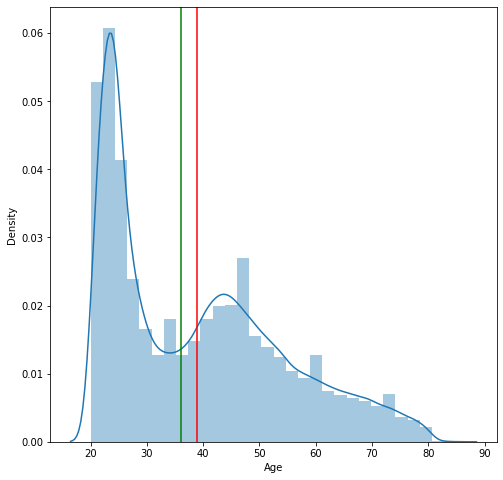

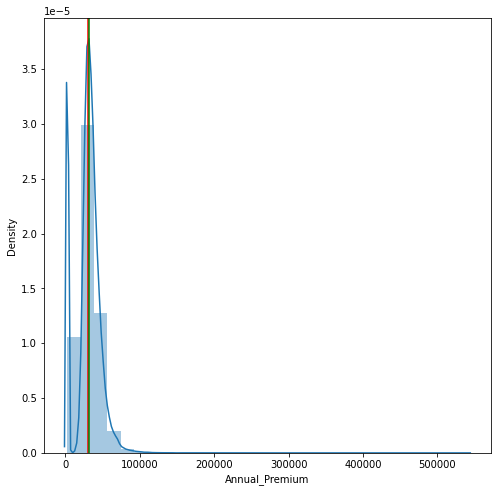

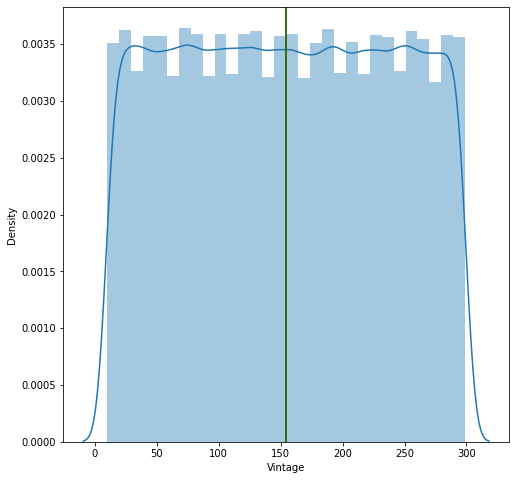

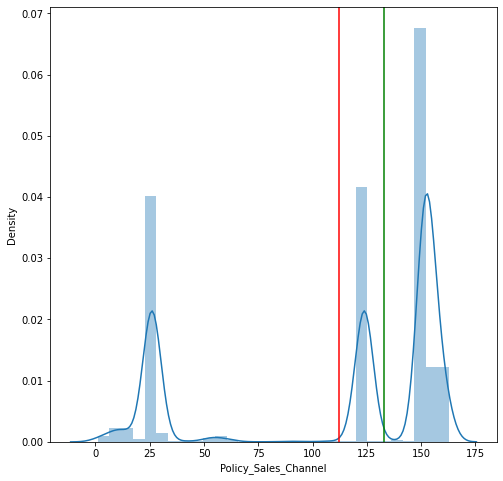

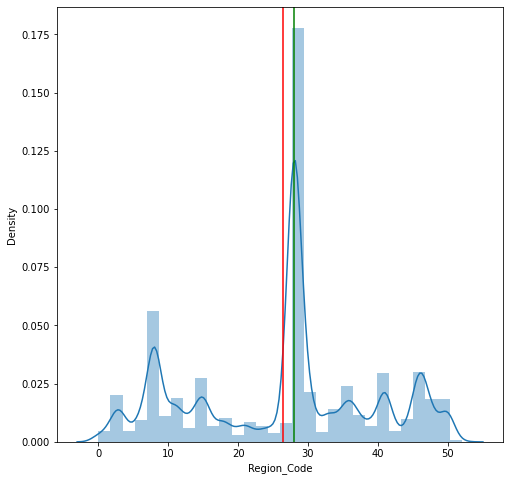

In [ ]:
for feature in numeric_features:
  plt.figure(figsize = (8,8))
  sns.distplot(df[feature], bins = 30)
  plt.axvline(x= df[feature].mean(),
              color='red')
  plt.axvline(x= df[feature].median(),
              color='g')


* Policy Channels have high densities in certain range of channels alone. This could indicate there are certain preferred channels for the predominant population. We could consider binning this feature.

* Annual Premium shows normal distribution

* Large number of population are in their early twenty's and mid forty's.

#### Box Plot

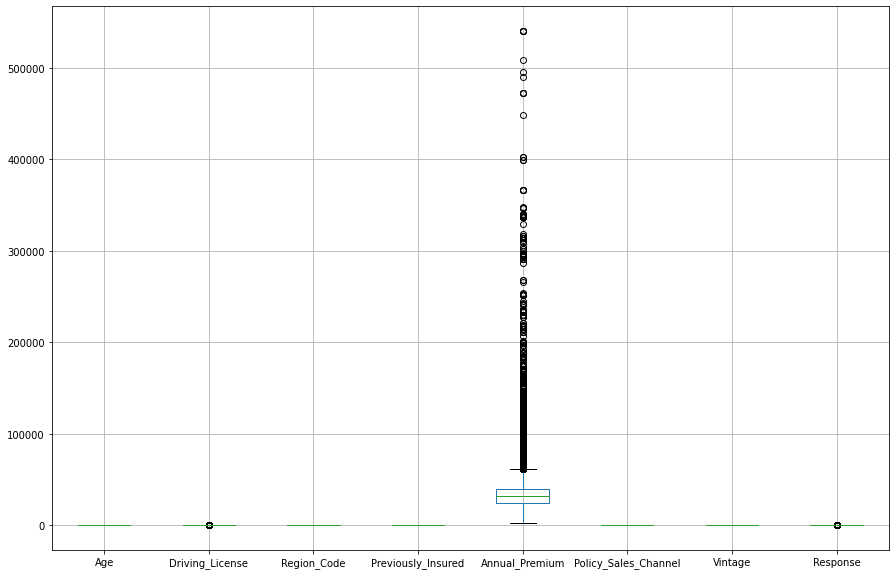

In [ ]:
df.boxplot( figsize = (15,10))

Annual Premium has considerable amount of outliers 

###Categorical Columns

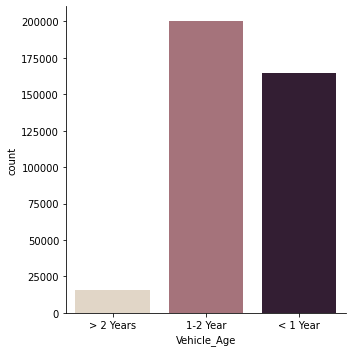

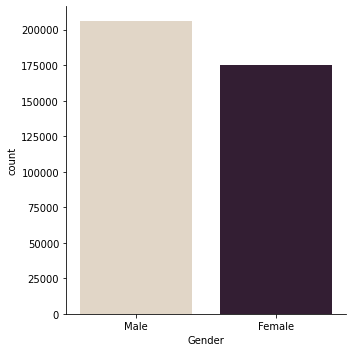

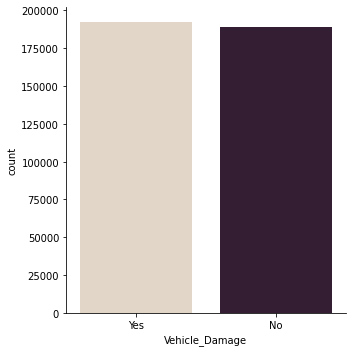

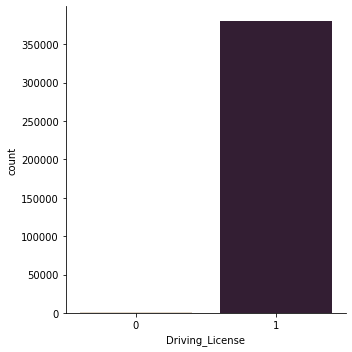

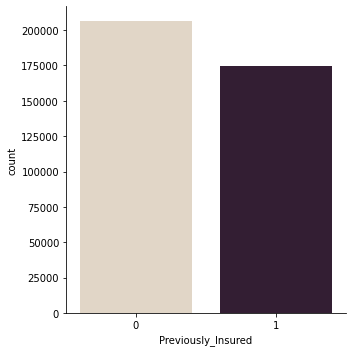

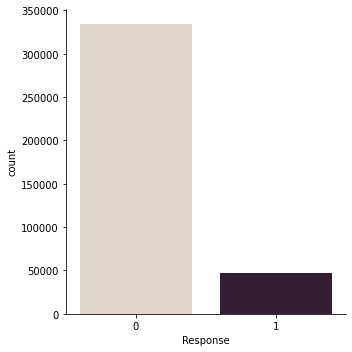

In [ ]:
for feature in (cat_label_features + cat_boolean_features  ):
  sns.catplot(x=feature, kind="count", palette="ch:.25", data=df)


* There is a very low ratio of people without driving license which is explained because the data is collected for Vehicle Insurance

* The target i.e responses columns has more negative response than positive responses which explains that the dataset is IMBALANCED.

* Most population's Vehicle Age is in between 0-2 years since most people subscribe their insurances succeeding the purchase of the vehicle

## Bivariate Analysis

### Continuous and Continuous

####Correlation Heatmap

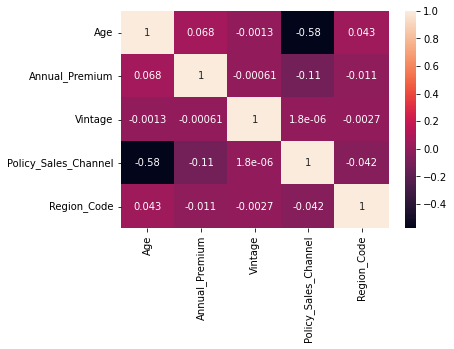

In [ ]:
sns.heatmap(df.loc[:,numeric_features].corr(), annot = True)

Age and Policy_sales_channel exhibit correlation of -0.58	

#### Scatter Plot

Age vs Policy Channel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.YTick at 0x7fe332756810>,
 <a list of 83 Text major ticklabel objects>)

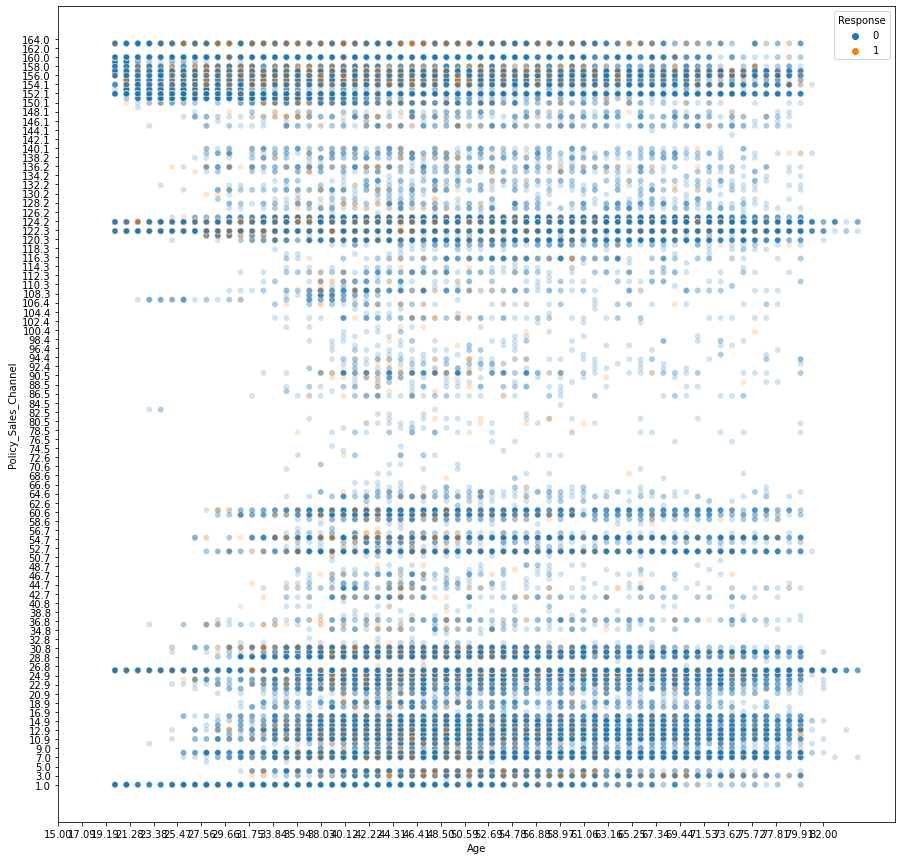

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(df['Age'],df['Policy_Sales_Channel'],hue = df['Response'],alpha = 0.2)
plt.xticks(ticks = np.linspace(15,82,33))
plt.yticks(ticks = np.linspace(1,164,83))

We can observe that among 155 Policy channels most people prefer channels in certain ranges. From the dense horizontal bars on the graph.

Relationship between annual premium and age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


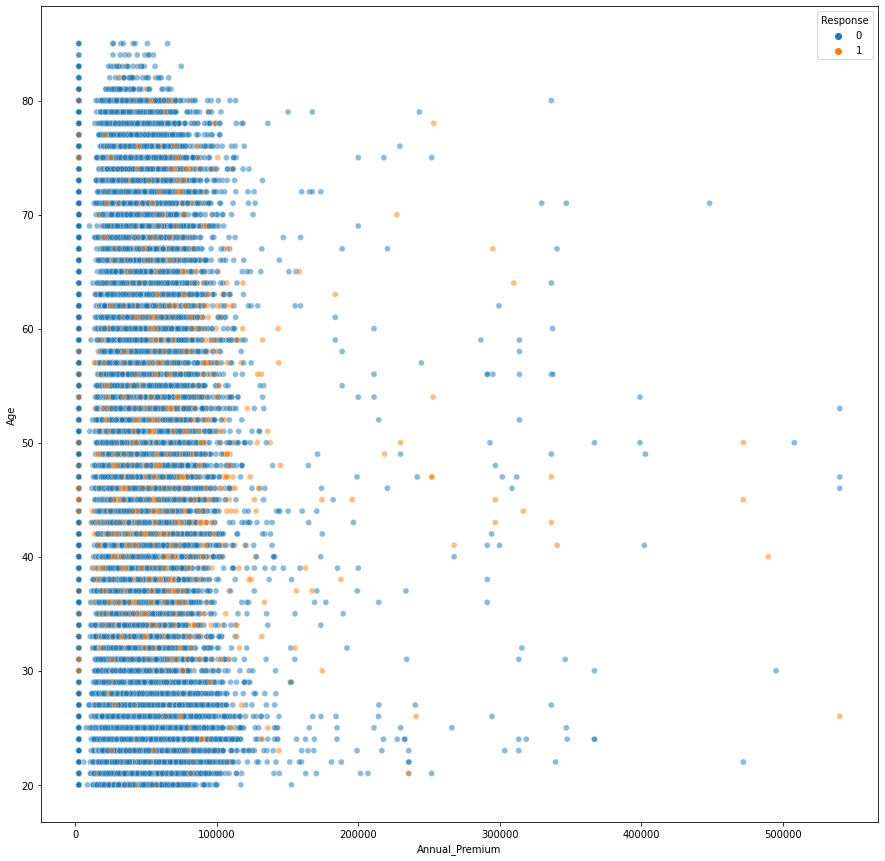

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(df['Annual_Premium'],df['Age'],hue = df['Response'],alpha = 0.5)


#### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = (df.loc[:,numeric_features].copy())
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF,variable
0,5.044031,Age
1,3.737498,Annual_Premium
2,3.995835,Vintage
3,3.623176,Policy_Sales_Channel
4,4.445521,Region_Code


### Categorical and Categorical

#### Test of Association

In [ ]:
pip install researchpy

In [ ]:
import researchpy as rp


In [ ]:
cat_features

['Vehicle_Age',
 'Gender',
 'Vehicle_Damage',
 'Driving_License',
 'Previously_Insured',
 'Response']

In [ ]:
from statsmodels.stats.contingency_tables import Table2x2
catcopy = cat_features.copy()
table = {'feature1':[],
         'feature2':[], 
         'Cramers_V_Score':[], 
         "Interpretation":[]}

for ftr1 in cat_features:
  for ftr2 in catcopy:
    if ftr1 != ftr2:
      crosstab, test_results, expected = rp.crosstab(df[ftr1], df[ftr2],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
      score = (test_results.loc[2, 'results'])
      table['feature1'].append(ftr1)
      table['feature2'].append(ftr2)
      
      table['Cramers_V_Score'].append(score)
      if score > 0.25:
        table['Interpretation'].append("Very Strong")
      elif score > 0.15:
        table['Interpretation'].append("Strong")
      elif score > .1:
        table['Interpretation'].append("Moderate")
      elif score >.05:
        table['Interpretation'].append("Weak")
      else:
        table['Interpretation'].append("None/Very Weak")
  catcopy.remove(ftr1)

table = pd.DataFrame(table)

In [ ]:
table[table.Cramers_V_Score > 0.25]

,feature1,feature2,Cramers_V_Score,Interpretation
1,Vehicle_Age,Vehicle_Damage,0.3969,Very Strong
3,Vehicle_Age,Previously_Insured,0.3809,Very Strong
10,Vehicle_Damage,Previously_Insured,0.8241,Very Strong
11,Vehicle_Damage,Response,0.3544,Very Strong
14,Previously_Insured,Response,0.3412,Very Strong


In [ ]:
table[table.Interpretation == 'Strong']

,feature1,feature2,Cramers_V_Score,Interpretation
0,Vehicle_Age,Gender,0.1668,Strong
4,Vehicle_Age,Response,0.2219,Strong


In [ ]:
table[table.Interpretation == 'Moderate']

,feature1,feature2,Cramers_V_Score,Interpretation


In [ ]:
table[table.Interpretation == 'Weak']

,feature1,feature2,Cramers_V_Score,Interpretation
5,Gender,Vehicle_Damage,0.0916,Weak
7,Gender,Previously_Insured,0.0819,Weak
8,Gender,Response,0.0524,Weak


In [ ]:
table[table.Interpretation == "None/Very Weak"]

,feature1,feature2,Cramers_V_Score,Interpretation
2,Vehicle_Age,Driving_License,0.0402,None/Very Weak
6,Gender,Driving_License,0.0184,None/Very Weak
9,Vehicle_Damage,Driving_License,0.0166,None/Very Weak
12,Driving_License,Previously_Insured,0.0150,None/Very Weak
13,Driving_License,Response,0.0102,None/Very Weak


Upon Chi Square testing of categorical variables, we observe.

* Vehicle Age has a strong statistical relationships with all features and target.

*Vehicle_Age,Previously_Insured have very strong and Vehicle_Damage have strong relationships with the targer variable

* Driving_License appears to have no or very weak statistical relationship on any other features or the targer

In [ ]:
table[table.feature2 == 'Response'].sort_values('Cramers_V_Score', ascending = False)

,feature1,feature2,Cramers_V_Score,Interpretation
11,Vehicle_Damage,Response,0.3544,Very Strong
14,Previously_Insured,Response,0.3412,Very Strong
4,Vehicle_Age,Response,0.2219,Strong
8,Gender,Response,0.0524,Weak
13,Driving_License,Response,0.0102,None/Very Weak


### Categorical and Continuous

#### CatPlot

<Figure size 576x576 with 0 Axes>

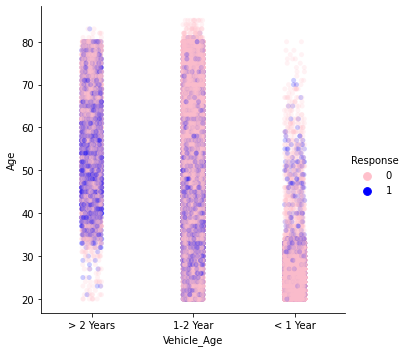

<Figure size 576x576 with 0 Axes>

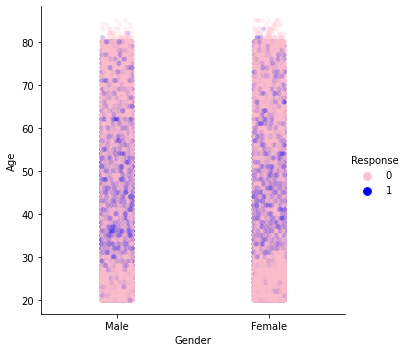

<Figure size 576x576 with 0 Axes>

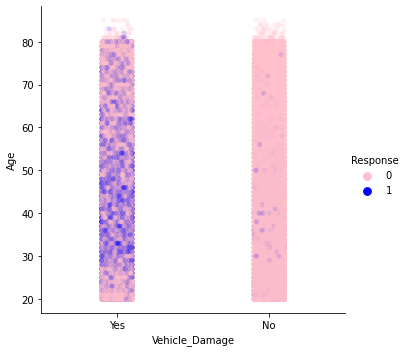

<Figure size 576x576 with 0 Axes>

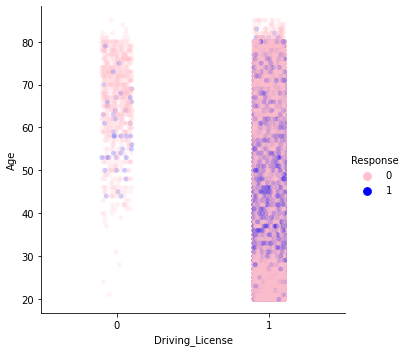

<Figure size 576x576 with 0 Axes>

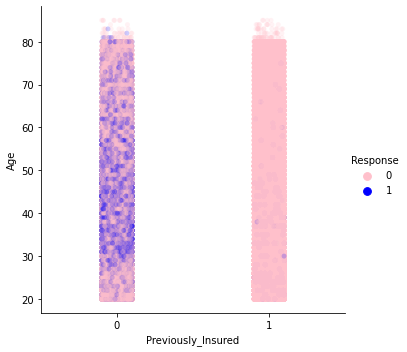

<Figure size 576x576 with 0 Axes>

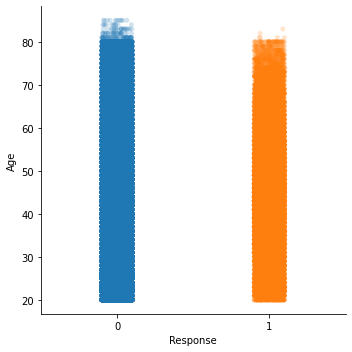

<Figure size 576x576 with 0 Axes>

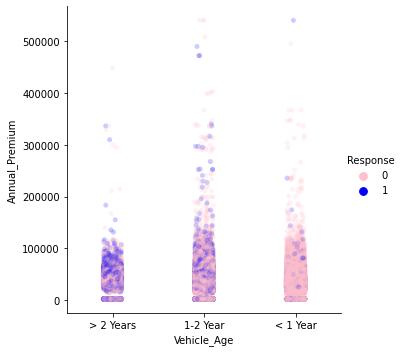

<Figure size 576x576 with 0 Axes>

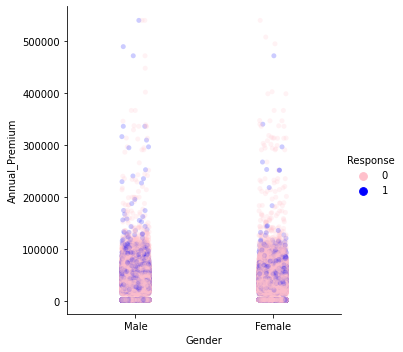

<Figure size 576x576 with 0 Axes>

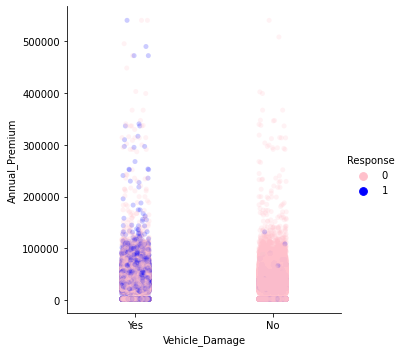

<Figure size 576x576 with 0 Axes>

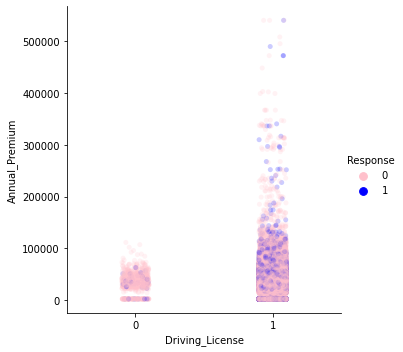

<Figure size 576x576 with 0 Axes>

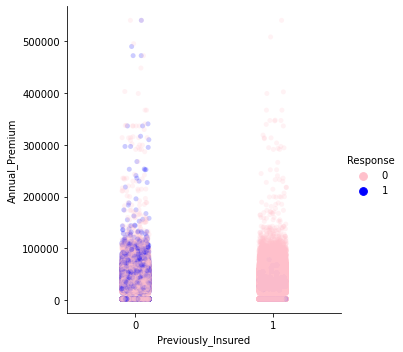

<Figure size 576x576 with 0 Axes>

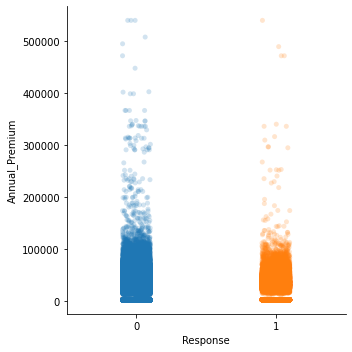

<Figure size 576x576 with 0 Axes>

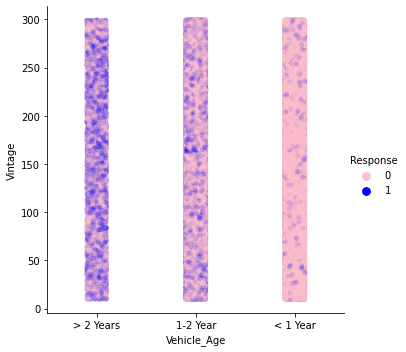

<Figure size 576x576 with 0 Axes>

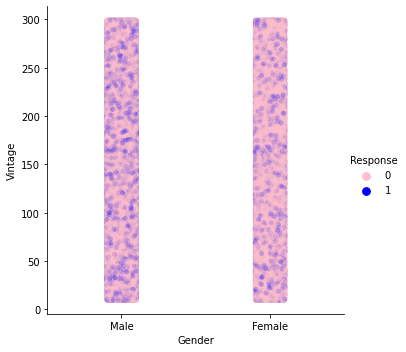

<Figure size 576x576 with 0 Axes>

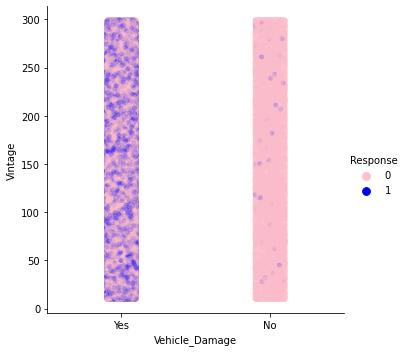

<Figure size 576x576 with 0 Axes>

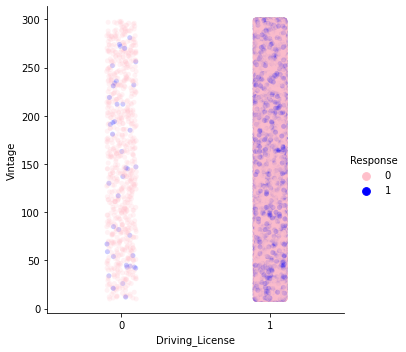

<Figure size 576x576 with 0 Axes>

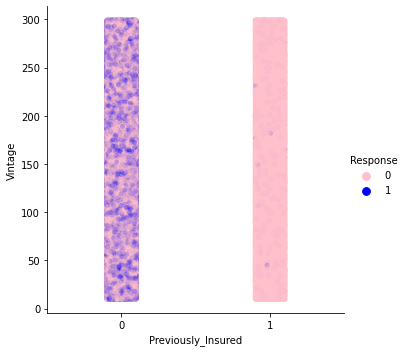

<Figure size 576x576 with 0 Axes>

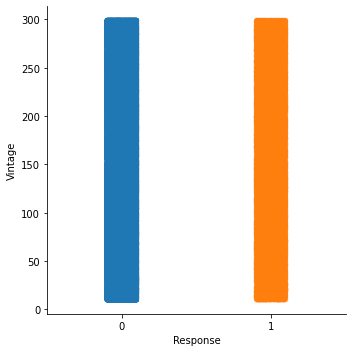

<Figure size 576x576 with 0 Axes>

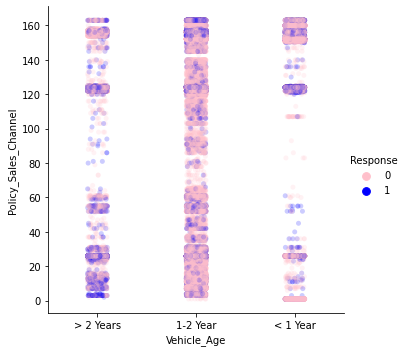

<Figure size 576x576 with 0 Axes>

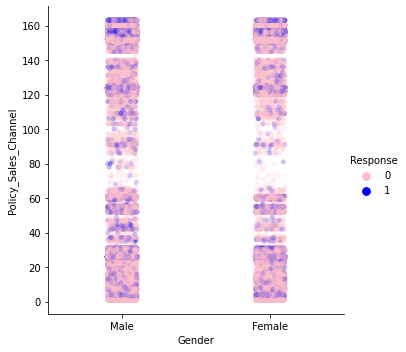

<Figure size 576x576 with 0 Axes>

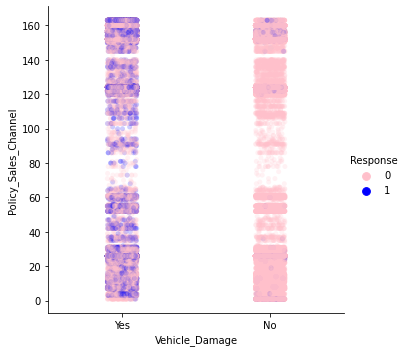

<Figure size 576x576 with 0 Axes>

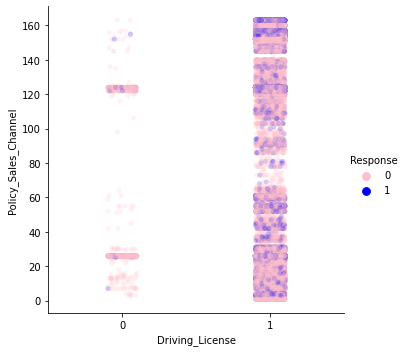

<Figure size 576x576 with 0 Axes>

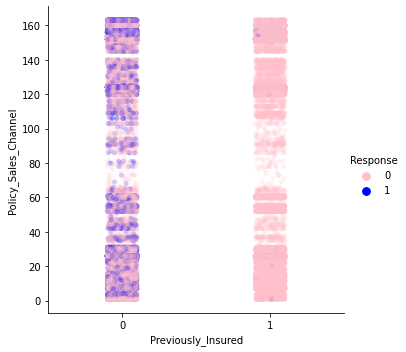

<Figure size 576x576 with 0 Axes>

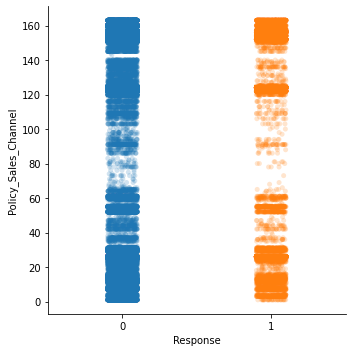

<Figure size 576x576 with 0 Axes>

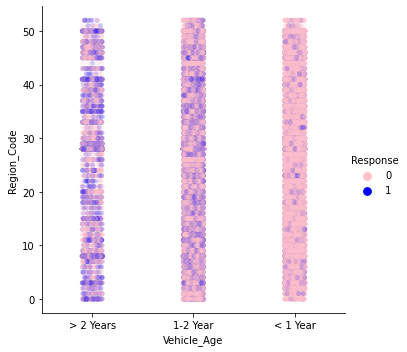

<Figure size 576x576 with 0 Axes>

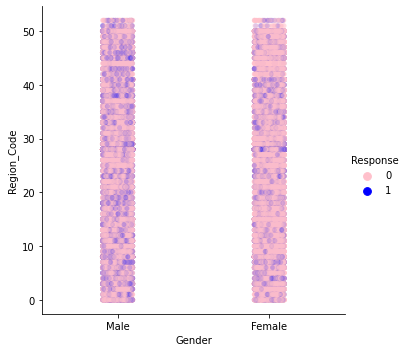

<Figure size 576x576 with 0 Axes>

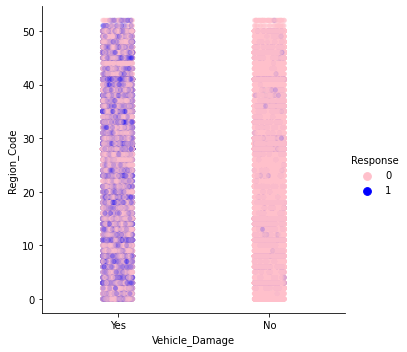

<Figure size 576x576 with 0 Axes>

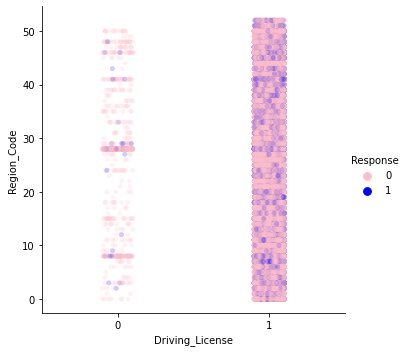

<Figure size 576x576 with 0 Axes>

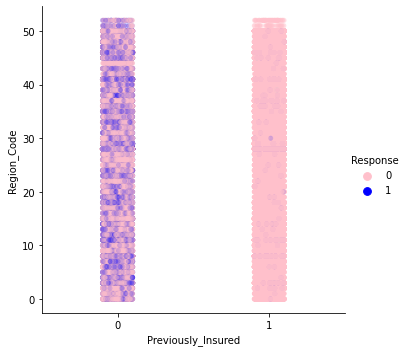

<Figure size 576x576 with 0 Axes>

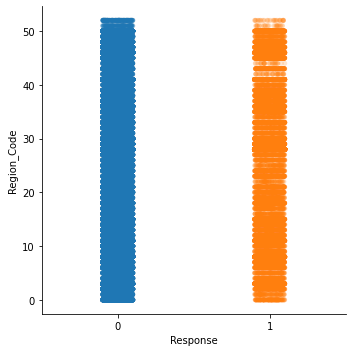

In [ ]:
for num in numeric_features:
  for cat in cat_features:
    if cat!= 'Response':
      plt.figure(figsize = (8,8))
      sns.catplot(x=cat, y = num, hue="Response", data= df, alpha = 0.2, palette={0:'pink', 1:'blue' })
    else:
      plt.figure(figsize = (8,8))
      sns.catplot(x=cat, y = num, data= df, alpha = 0.2)
      plt.show()

#### Violin Plot

It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compare

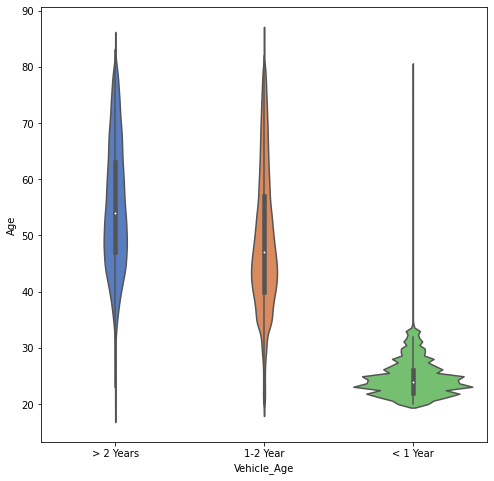

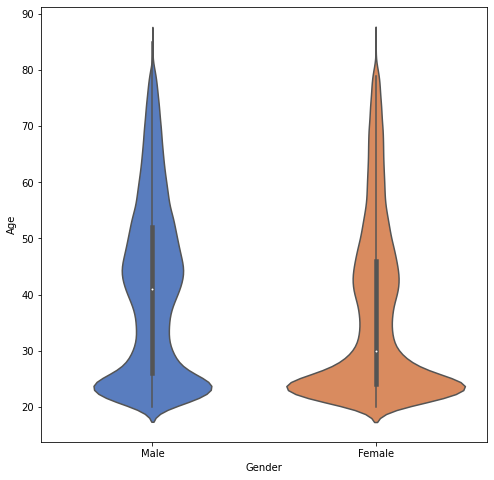

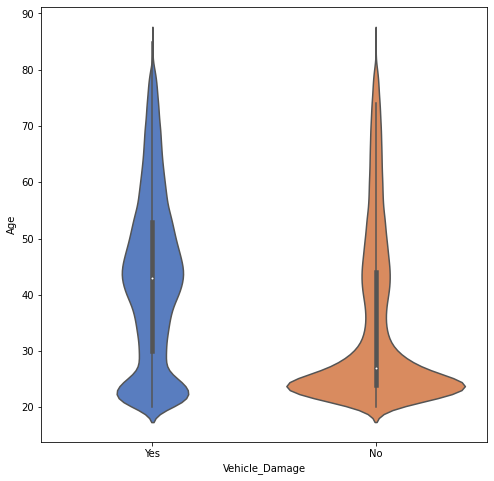

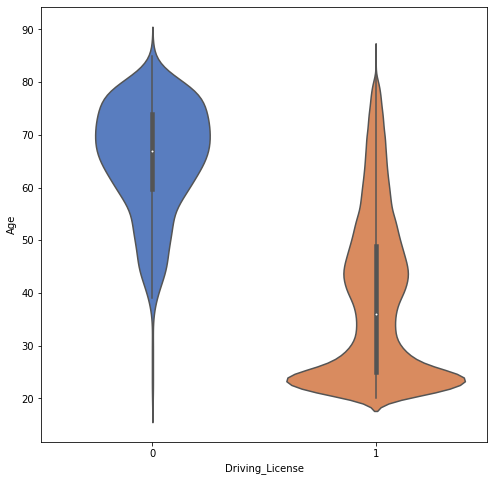

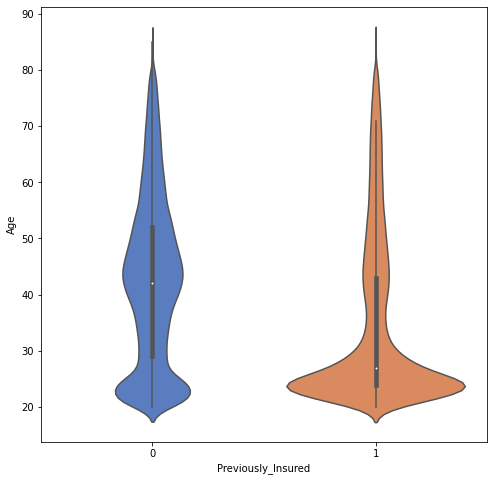

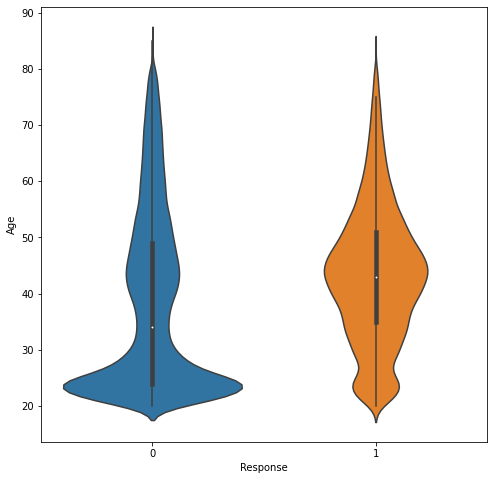

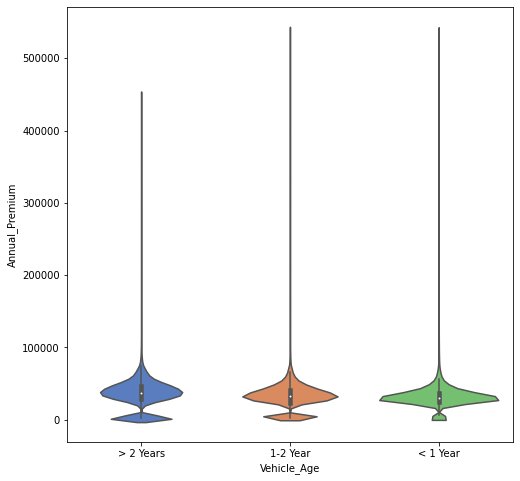

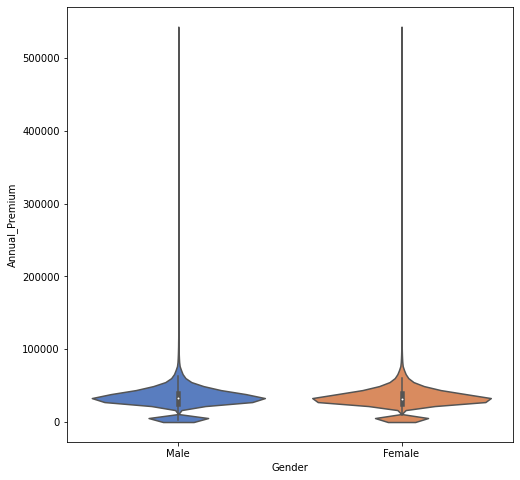

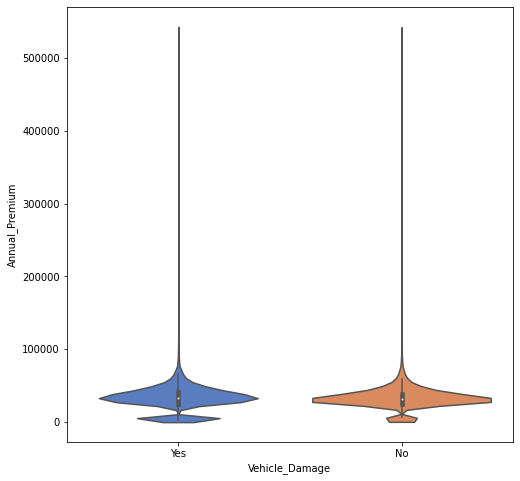

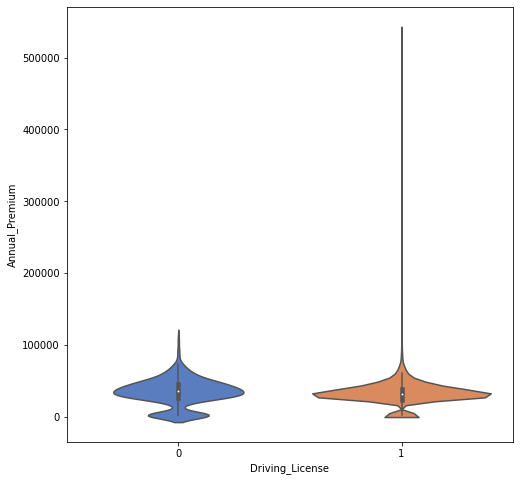

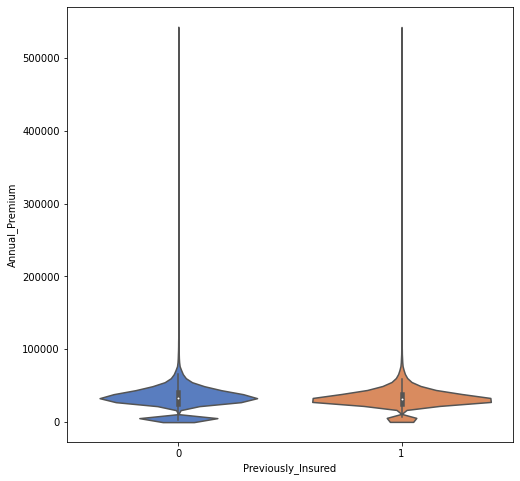

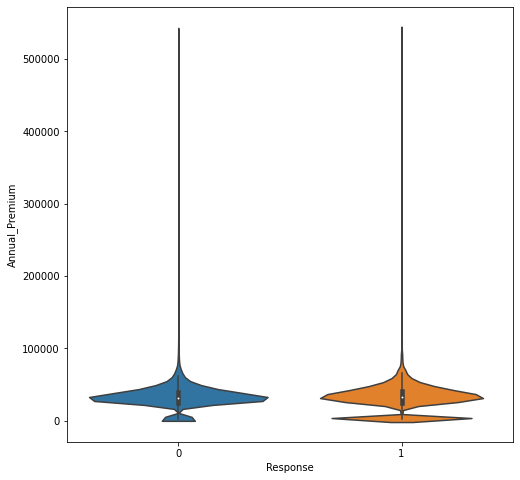

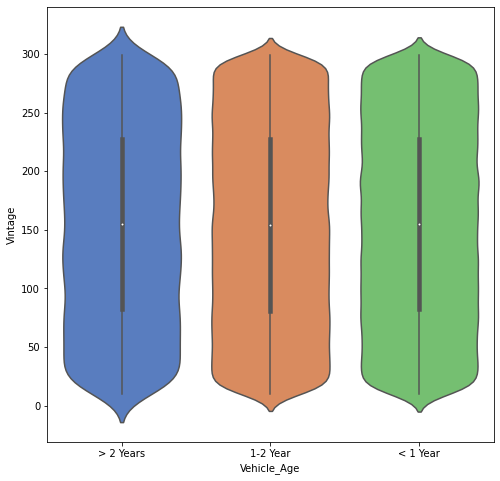

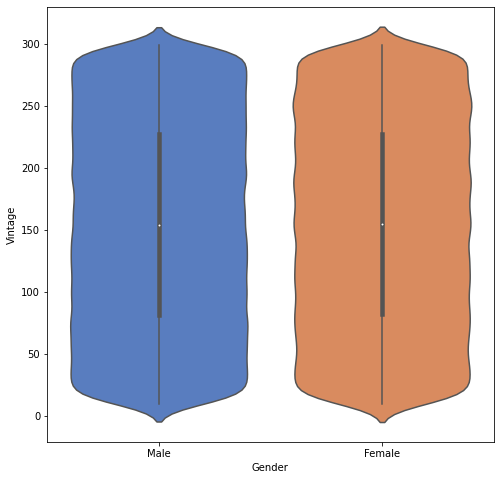

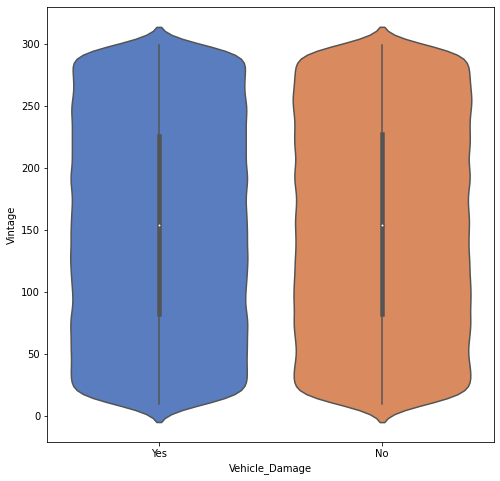

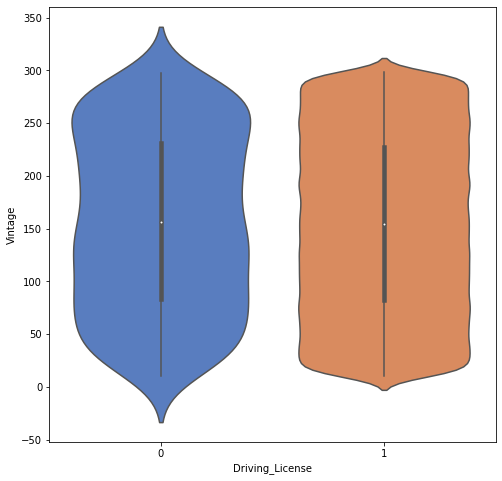

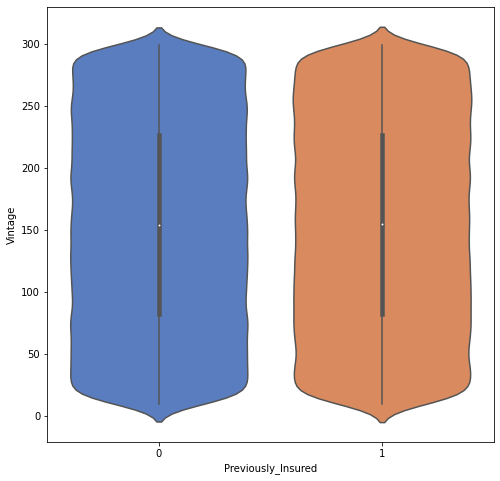

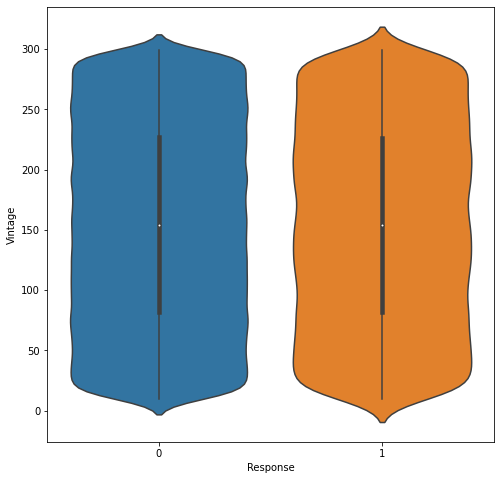

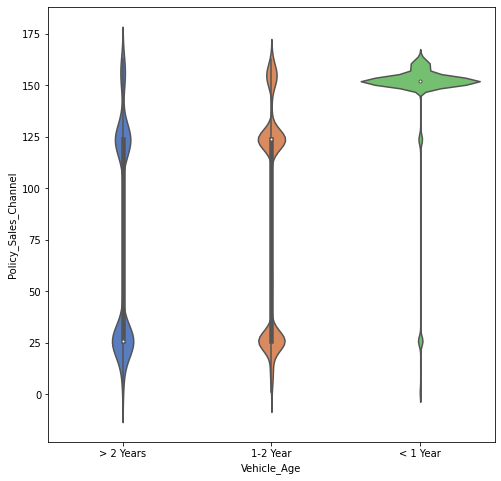

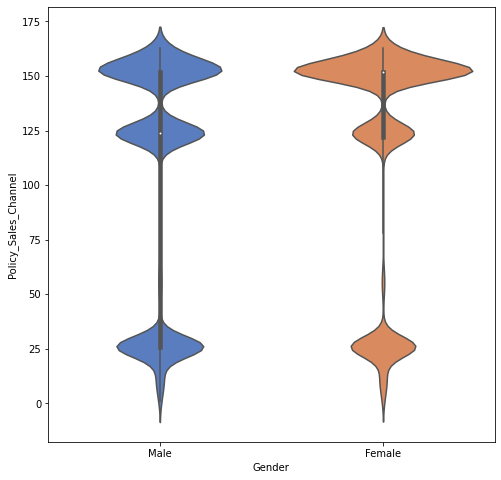

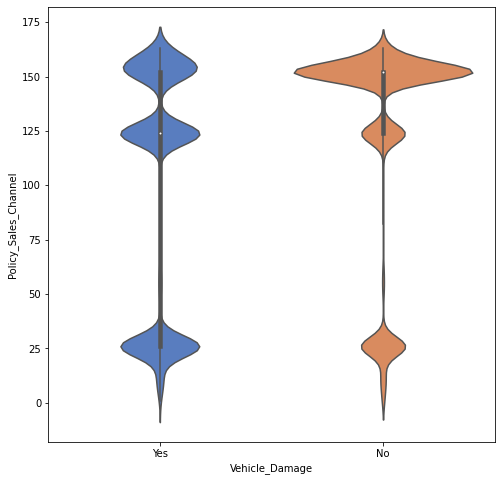

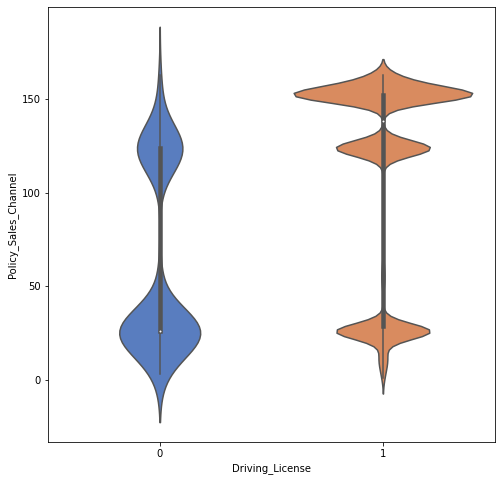

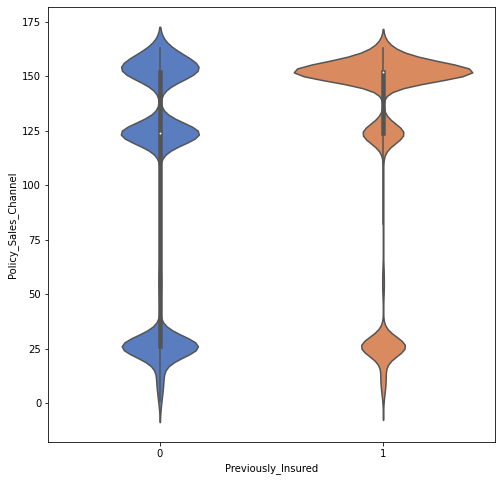

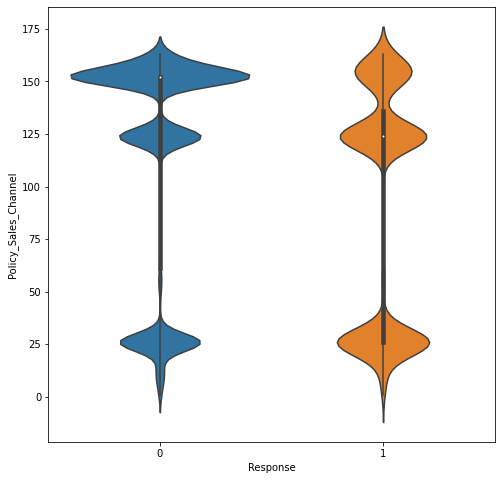

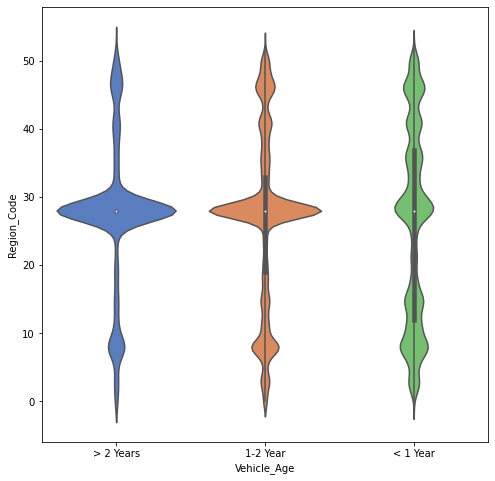

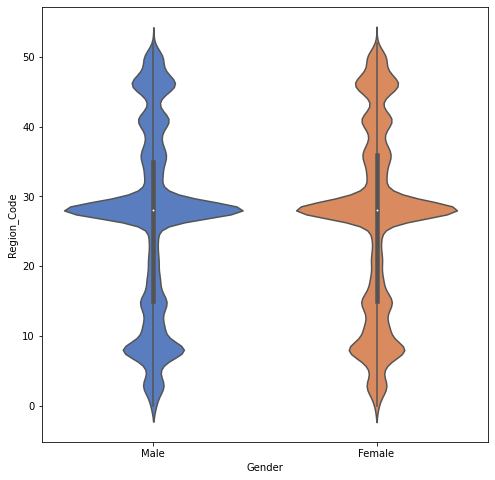

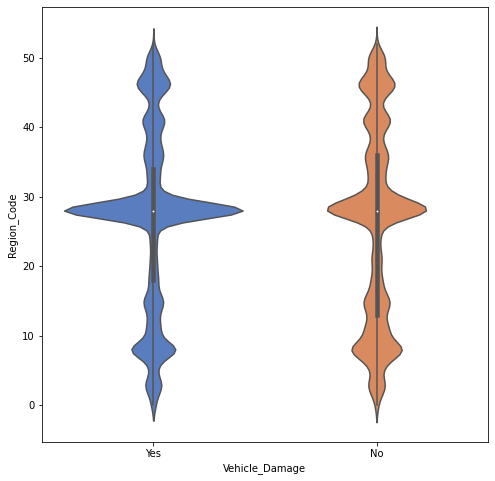

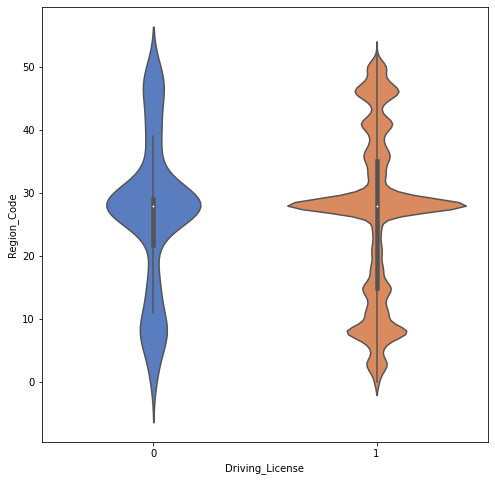

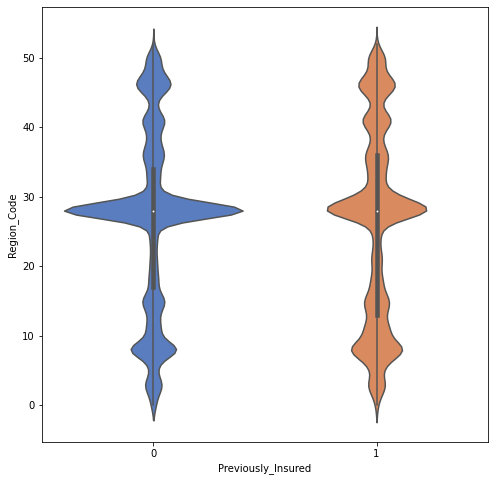

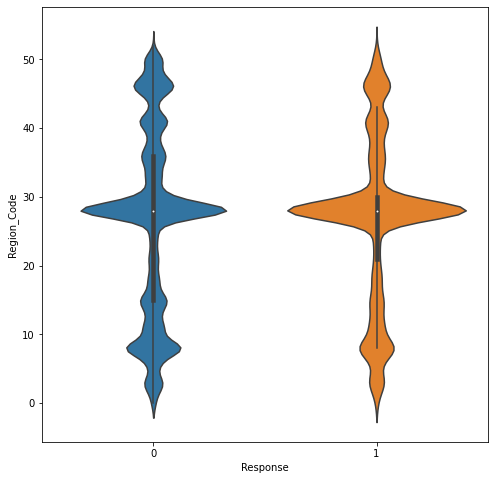

In [ ]:
for num in numeric_features:
  for cat in cat_features:
    if cat!= 'Response':
      plt.figure(figsize = (8,8))
      sns.violinplot(x=cat, y = num, data= df, palette = 'muted' )
    else:
      plt.figure(figsize = (8,8))
      sns.violinplot(x=cat, y = num, data= df )
      plt.show()

In the violin plots with policy_sales_channel we can notice that the populations are dense in three specific regions alone regardless of the categories. Given that the nature of the feature is in itself categorical, we can bin this based on its population distribution.

Similarly, Region_Code exhibits this feature. The waves are wider in the same regions. Which could also be binned

#Feature Engineering

## Outlier Treatment

### Numerical Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


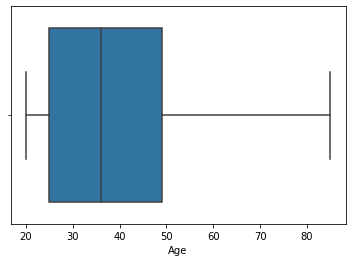

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


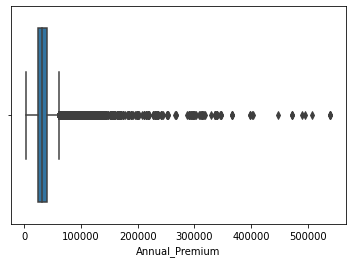

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


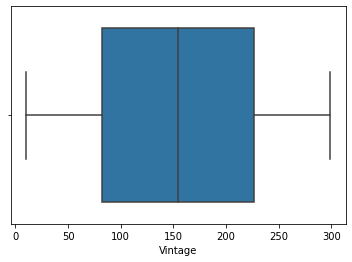

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


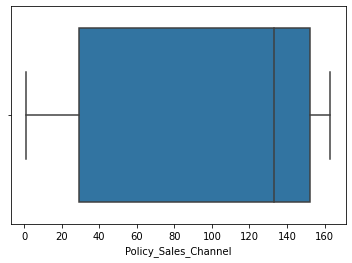

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


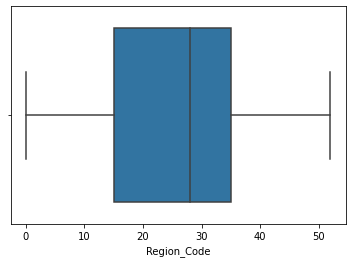

In [ ]:
for feature in numeric_features:
  sns.boxplot(df[feature])
  plt.show()

In [ ]:
for ftr in numeric_features: 
  print(ftr,'\n')
  q25, q75 = np.percentile(df[ftr], 25), np.percentile(df[ftr], 75)
  iqr = q75 - q25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:
    
    def label(row):
      if row[ftr] > upper: 
        return 1
      if row[ftr] < lower:
        return 1
      else:
        return 0

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]
    
    df[ftr + '_Outlier'] =  df.apply (lambda row: label(row), axis=1)
    df[ftr ] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

Age 

Percentiles: 25th=25.000, 75th=49.000, IQR=24.000
Identified outliers: 0

-------

Annual_Premium 

Percentiles: 25th=24405.000, 75th=39400.000, IQR=14995.000
Identified outliers: 10320
Annual_Premium Outliers Removed

-------

Vintage 

Percentiles: 25th=82.000, 75th=227.000, IQR=145.000
Identified outliers: 0

-------

Policy_Sales_Channel 

Percentiles: 25th=29.000, 75th=152.000, IQR=123.000
Identified outliers: 0

-------

Region_Code 

Percentiles: 25th=15.000, 75th=35.000, IQR=20.000
Identified outliers: 0

-------



### Detecting Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
X = (df.loc[:,numeric_features].copy())
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,5.154515,Age
1,4.221447,Annual_Premium
2,4.004905,Vintage
3,3.669516,Policy_Sales_Channel
4,4.457084,Region_Code


### Binning Numerical Feature into Cat

Policy_Sales_Channel and Region_Code binned Based on Violin Plot Distribution

In [ ]:
a = {
    'col': [],
     'item':[],
     'percent':[]
}
for item in df['Policy_Sales_Channel'].unique():
  percent = 100*len(df[df['Policy_Sales_Channel']==item])/df.shape[0]
  a['col'].append('Policy_Sales_Channel')
  a['item'].append(item)
  a['percent'].append(percent)

for item in df['Region_Code'].unique():
  percent = 100*len(df[df['Region_Code']==item])/df.shape[0]
  a['col'].append('Region_Code')
  a['item'].append(item)
  a['percent'].append(percent)

a = pd.DataFrame(a)
pc_table = (a[a.col == 'Policy_Sales_Channel'])
rc_table = (a[a.col == 'Region_Code'])

In [ ]:
[len(pc_table),
 len(pc_table[pc_table.percent > 5]),
len(pc_table[pc_table.percent <= 5]),
len(pc_table[pc_table.percent <= 3]),
len(pc_table[pc_table.percent <= 1]) ]

[155, 4, 151, 151, 146]

In [ ]:
pc_table[pc_table.percent > 5]

,col,item,percent
0,Policy_Sales_Channel,26.0,20.912652
1,Policy_Sales_Channel,152.0,35.366260
2,Policy_Sales_Channel,160.0,5.714638
3,Policy_Sales_Channel,124.0,19.415705


In [ ]:
[len(rc_table),
 len(rc_table[rc_table.percent >5 ]),
len(rc_table[rc_table.percent <= 5]),
len(rc_table[rc_table.percent <= 3]),
len(rc_table[rc_table.percent <= 1]),]

[53, 3, 50, 47, 28]

In [ ]:
rc_table[rc_table.percent > 5]

,col,item,percent
155,Region_Code,28.0,27.922458
165,Region_Code,8.0,8.889058
181,Region_Code,46.0,5.181982


In [ ]:
df_dupe = df.copy()
for ftr in ['Policy_Sales_Channel','Region_Code']:
  print(f"--------\nColumn:{ftr} \n")
  for item in df_dupe[ftr].unique():
    if len(df_dupe[df_dupe[ftr]==item])/df_dupe.shape[0] < 0.05: #categories with less than 1% occurence are binned together
      print(f"Feature:{ftr} Item:{item}   % Found {len(df_dupe[df_dupe[ftr]==item])/df_dupe.shape[0]} \n ")
      df_dupe[ftr].replace(item, 'Rare', inplace = True)

--------
Column:Policy_Sales_Channel 

Feature:Policy_Sales_Channel Item:14.0   % Found 0.0016320790115163903 
 
Feature:Policy_Sales_Channel Item:13.0   % Found 0.004893613113308791 
 
Feature:Policy_Sales_Channel Item:30.0   % Found 0.003699728948935869 
 
Feature:Policy_Sales_Channel Item:156.0   % Found 0.0279736243436917 
 
Feature:Policy_Sales_Channel Item:163.0   % Found 0.007591004148419481 
 
Feature:Policy_Sales_Channel Item:157.0   % Found 0.017538289570700246 
 
Feature:Policy_Sales_Channel Item:122.0   % Found 0.026055537916973882 
 
Feature:Policy_Sales_Channel Item:19.0   % Found 0.0005825105153643708 
 
Feature:Policy_Sales_Channel Item:22.0   % Found 0.0008711418518061762 
 
Feature:Policy_Sales_Channel Item:15.0   % Found 0.0023300420614574833 
 
Feature:Policy_Sales_Channel Item:154.0   % Found 0.015725159993597634 
 
Feature:Policy_Sales_Channel Item:16.0   % Found 0.0013723108087187654 
 
Feature:Policy_Sales_Channel Item:52.0   % Found 0.0027682369086009513 
 
Fea

In [ ]:
crosstab, test_results, expected = rp.crosstab(df['Policy_Sales_Channel'], df['Response'],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
test_results

,Chi-square test,results
0,Pearson Chi-square ( 154.0) =,26447.0329
1,p-value =,0.0000
2,Cramer's V =,0.2634


Policy_Sales_Channel after binning shows very strong association to targer response

In [ ]:
crosstab, test_results, expected = rp.crosstab(df['Region_Code'], df['Response'],
                                                    test= "chi-square",
                                                    expected_freqs= True,
                                                    prop= "cell")
test_results

,Chi-square test,results
0,Pearson Chi-square ( 52.0) =,7267.8425
1,p-value =,0.0000
2,Cramer's V =,0.1381


Region_code shows moderate association to target variable

In [ ]:
for ftr in ['Policy_Sales_Channel','Region_Code']:
  print(f"--------\nColumn:{ftr} \n")
  for item in df[ftr].unique():
    if len(df[df[ftr]==item])/df.shape[0] < 0.05: #categories with less than 1% occurence are binned together
      print(f"Feature:{ftr} Item:{item}   % Found {len(df[df[ftr]==item])/df.shape[0]} \n ")
      df[ftr].replace(item, 'Rare', inplace = True)

--------
Column:Policy_Sales_Channel 

Feature:Policy_Sales_Channel Item:14.0   % Found 0.0016320790115163903 
 
Feature:Policy_Sales_Channel Item:13.0   % Found 0.004893613113308791 
 
Feature:Policy_Sales_Channel Item:30.0   % Found 0.003699728948935869 
 
Feature:Policy_Sales_Channel Item:156.0   % Found 0.0279736243436917 
 
Feature:Policy_Sales_Channel Item:163.0   % Found 0.007591004148419481 
 
Feature:Policy_Sales_Channel Item:157.0   % Found 0.017538289570700246 
 
Feature:Policy_Sales_Channel Item:122.0   % Found 0.026055537916973882 
 
Feature:Policy_Sales_Channel Item:19.0   % Found 0.0005825105153643708 
 
Feature:Policy_Sales_Channel Item:22.0   % Found 0.0008711418518061762 
 
Feature:Policy_Sales_Channel Item:15.0   % Found 0.0023300420614574833 
 
Feature:Policy_Sales_Channel Item:154.0   % Found 0.015725159993597634 
 
Feature:Policy_Sales_Channel Item:16.0   % Found 0.0013723108087187654 
 
Feature:Policy_Sales_Channel Item:52.0   % Found 0.0027682369086009513 
 
Fea

In [ ]:
df = pd.concat([pd.get_dummies(df['Policy_Sales_Channel'],prefix = 'Policy_Sales_Channel'), df.drop('Policy_Sales_Channel', axis = 1)], axis =1)
df = pd.concat([pd.get_dummies(df['Region_Code'],prefix = 'Region_Code'), df.drop('Region_Code', axis = 1)], axis =1)
df

,Region_Code_8.0,Region_Code_28.0,Region_Code_46.0,Region_Code_Rare,Policy_Sales_Channel_26.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_152.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_Rare,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Annual_Premium_Outlier
0,0,1,0,0,1,0,0,0,0,Male,44,1,0,> 2 Years,Yes,40454.0,217,1,0
1,0,0,0,1,1,0,0,0,0,Male,76,1,0,1-2 Year,No,33536.0,183,0,0
2,0,1,0,0,1,0,0,0,0,Male,47,1,0,> 2 Years,Yes,38294.0,27,1,0
3,0,0,0,1,0,0,1,0,0,Male,21,1,1,< 1 Year,No,28619.0,203,0,0
4,0,0,0,1,0,0,1,0,0,Female,29,1,1,< 1 Year,No,27496.0,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,0,0,1,1,0,0,0,0,Male,74,1,1,1-2 Year,No,30170.0,88,0,0
381105,0,0,0,1,0,0,1,0,0,Male,30,1,1,< 1 Year,No,40016.0,131,0,0
381106,0,0,0,1,0,0,0,1,0,Male,21,1,1,< 1 Year,No,35118.0,161,0,0
381107,0,0,0,1,0,1,0,0,0,Female,68,1,0,> 2 Years,Yes,44617.0,74,0,0


### Handling Rare Categorical Variables

In [ ]:
for ftr in cat_features:
  print(f"--------\nColumn:{ftr} \n")
  for item in df[ftr].unique():
    if len(df[df[ftr]==item])/df.shape[0] < 0.01: #categories with less than 1% occurence are binned together
      print(f"Item:{item}   % Found {len(df[df[ftr]==item])/df.shape[0]} \n ")

--------
Column:Vehicle_Age 

--------
Column:Gender 

--------
Column:Vehicle_Damage 

--------
Column:Driving_License 

Item:0   % Found 0.0021306240471885996 
 
--------
Column:Previously_Insured 

--------
Column:Response 



In [ ]:
for ftr in cat_features:
  print(ftr,f"Unique Values: {df[ftr].unique()}\n")

Vehicle_Age Unique Values: ['> 2 Years' '1-2 Year' '< 1 Year']

Gender Unique Values: ['Male' 'Female']

Vehicle_Damage Unique Values: ['Yes' 'No']

Driving_License Unique Values: [1 0]

Previously_Insured Unique Values: [0 1]

Response Unique Values: [1 0]



## Encoding Categorical Features

In [ ]:
cat_label_features

['Vehicle_Age', 'Gender', 'Vehicle_Damage']

Encoding Column Vehicle Age ordinally

In [ ]:
cleanup_nums = {"Vehicle_Age":    {'> 2 Years':2, '1-2 Year':1, '< 1 Year':0},
                "Gender": {'Male':0, 'Female':1},
                "Vehicle_Damage":{'Yes':1, 'No':0}
                }
df.replace(cleanup_nums, inplace = True)                

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Region_Code_8.0             381109 non-null  uint8  
 1   Region_Code_28.0            381109 non-null  uint8  
 2   Region_Code_46.0            381109 non-null  uint8  
 3   Region_Code_Rare            381109 non-null  uint8  
 4   Policy_Sales_Channel_26.0   381109 non-null  uint8  
 5   Policy_Sales_Channel_124.0  381109 non-null  uint8  
 6   Policy_Sales_Channel_152.0  381109 non-null  uint8  
 7   Policy_Sales_Channel_160.0  381109 non-null  uint8  
 8   Policy_Sales_Channel_Rare   381109 non-null  uint8  
 9   Gender                      381109 non-null  int64  
 10  Age                         381109 non-null  int64  
 11  Driving_License             381109 non-null  int64  
 12  Previously_Insured          381109 non-null  int64  
 13  Vehicle_Age   

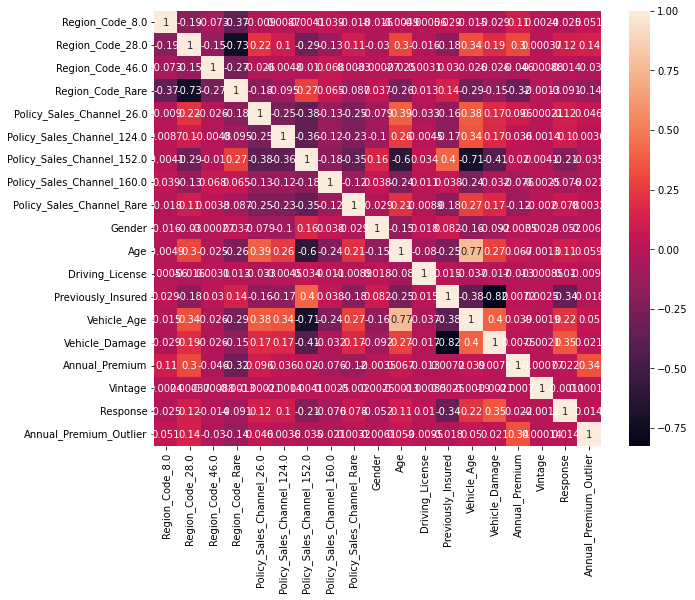

In [ ]:
plt.figure(figsize = (10,8
                      ))
sns.heatmap(df.corr(), annot = True)

In [ ]:
X, y = df.drop(['Response'],axis=1), df['Response']

In [ ]:
X.to_csv('Cleaned_X.csv')
y.to_csv('Cleaned_y.csv')

##Functions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify = y )

In [ ]:
#function to scale
def do_scale(X_train, X_test, scaling_type = StandardScaler):
  scaler = scaling_type()
  scaler.fit(X_train)
  X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
  return X_train_scaled, X_test_scaled


### Dimensionality Reduction: PCA

In [ ]:
from sklearn.decomposition import PCA
#function to reduce dimension
def do_PCA(X_train,y_train,X_test, y_test, n_components = 13):

  #X_train, y_train, X_test, y_test, n_components

  pca = PCA(n_components)
  pca.fit(X_train, y_train)
  X_train_PCA = pca.transform(X_train)
  X_test_PCA = pca.transform(X_test)

  exp_var_pca = pca.explained_variance_ratio_
  cum_sum_eigenvalues = np.cumsum(exp_var_pca)

  plt.figure(figsize = (15,15))
  plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
  plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
  plt.yticks(ticks = np.arange(0,1,0.05))
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal component index')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()
  columns = [ f"PCA{i}" for i in np.arange(1,n_components +1,1) ]
  X_train_PCA = pd.DataFrame(X_train_PCA, columns = columns )
  X_test_PCA = pd.DataFrame(X_test_PCA, columns = columns)

  return X_train_PCA, X_test_PCA


### Sampling



In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

def do_sampling(X,y, sample_type, categorical_feature_index = None):
  if sample_type != SMOTENC :
    sampler = sample_type()
  else:
    sampler = sample_type(categorical_features= categorical_feature_index)
  # transform the dataset
  return sampler.fit_resample(X, y)


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, recall_score , confusion_matrix
from sklearn.metrics import roc_curve, auc, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.naive_bayes import  MultinomialNB, BernoulliNB,GaussianNB #do partial fit dirst
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score

In [91]:
report = {
    'technique':[],
    'model_name':[],
    'f1_score':[],
    'recall':[],
    'accuracy_score':[],
    'f0.5':[],
    'f2.0':[]
}
# function to evaluate and update model and score
def evaluate(technique,modelname, Model, X_train, y_train, X_test, y_test):
  
  if modelname in report['model_name']:
    print("Prexisting Model")
    return 0
  X_tr = X_train.copy()
  X_te = X_test.copy()

  print(f"\nTraining {str(Model)}")
  Model.fit(X_tr, y_train)

  print(f"\nPredicting{str(Model)} scores \n")

  y_pred = Model.predict(X_te)

  f1 = f1_score(y_pred,y_test)
  report['f1_score'].append(f1)

  recall = recall_score(y_pred,y_test)
  report['recall'].append(recall)

  acc = accuracy_score(y_pred,y_test)
  report['accuracy_score'].append(acc)

  cm = confusion_matrix(y_pred, y_test)
  report['model_name'].append(modelname)

  f_05 = fbeta_score(y_pred, y_test,beta = 0.5)
  report['f0.5'].append(f_05)

  f_2 = fbeta_score(y_pred, y_test,beta = 2.0)
  report['f2.0'].append(f_2)

  report['technique'].append(technique)

  print(f"\nUpdated {str(Model)} scores into report")

  print(f"\n\n\n ConfusionMatrix \n {cm}\n")
  



In [ ]:
#displays report in a dataframe
def display_report():
  return pd.DataFrame(report)

# Baseline Spotchecking

 

 Linear Algorithm


*   Logistic Regression

Non Linear Algorithm
* Decision Tree
* k-Nearest Neighbours
* SVM

Ensemble Algorithm
* Random Forest
* Bagged Decision Trees
* Stochastic Gradient Boosting





In [ ]:
# define models to test
def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='lbfgs'))
  names.append('LogisticRegression')
  # DecisionTreeClassifier
  models.append((DecisionTreeClassifier()))
  names.append('DecisionTreeClassifier')
  #RandomForestClassifier
  models.append(RandomForestClassifier())
  names.append('RandomForestClassifier')

  # GradientBoostingClassifier
  models.append(GradientBoostingClassifier())
  names.append('GradientBoostingClassifier')

  #BaggingClassifier
  models.append(BaggingClassifier())
  names.append('BaggingClassifie')

  # GNB
  models.append(GaussianNB())
  names.append('Gaussian Naive Bayes')

  # MNB
  models.append(MultinomialNB())
  names.append('Multinomial Bayes')

  # MNB
  models.append(BernoulliNB())
  names.append('Bernoulli Bayes')


  # KNeighborsClassifier
  models.append(KNeighborsClassifier())
  names.append('KNeighborsClassifier')


  return models, names

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304887, 18), (76222, 18), (304887,), (76222,))

###Scaling

In [88]:
X_train_scaled, X_test_scaled = do_scale(X_train, X_test,scaling_type = MinMaxScaler)

In [89]:
X_train_scaled.shape , X_test_scaled.shape

((304887, 18), (76222, 18))

In [ ]:
models, names = get_models()
for i in range(len(models)):
  evaluate("Plain",names[i],models[i],X_train_scaled, y_train, X_test_scaled,y_test)

In [ ]:
baseline = display_report()

In [ ]:
baseline

,model_name,f1_score,recall,accuracy_score,f0.5,f2.0
0,LogisticRegression,0.000214,0.250000,0.877411,0.000134,0.000534
1,DecisionTreeClassifier,0.291730,0.284927,0.822138,0.295970,0.287610
2,KNeighborsClassifier,0.237992,0.343076,0.857010,0.201044,0.291578
3,RandomForestClassifier,0.214173,0.327245,0.856839,0.177395,0.270187
4,GradientBoostingClassifier,0.003413,0.470588,0.877411,0.002139,0.008441
5,BaggingClassifie,0.206009,0.324879,0.857508,0.168925,0.263957
6,Gaussian Naive Bayes,0.428909,0.283115,0.711383,0.620689,0.327667


###Applying PCA and Testing

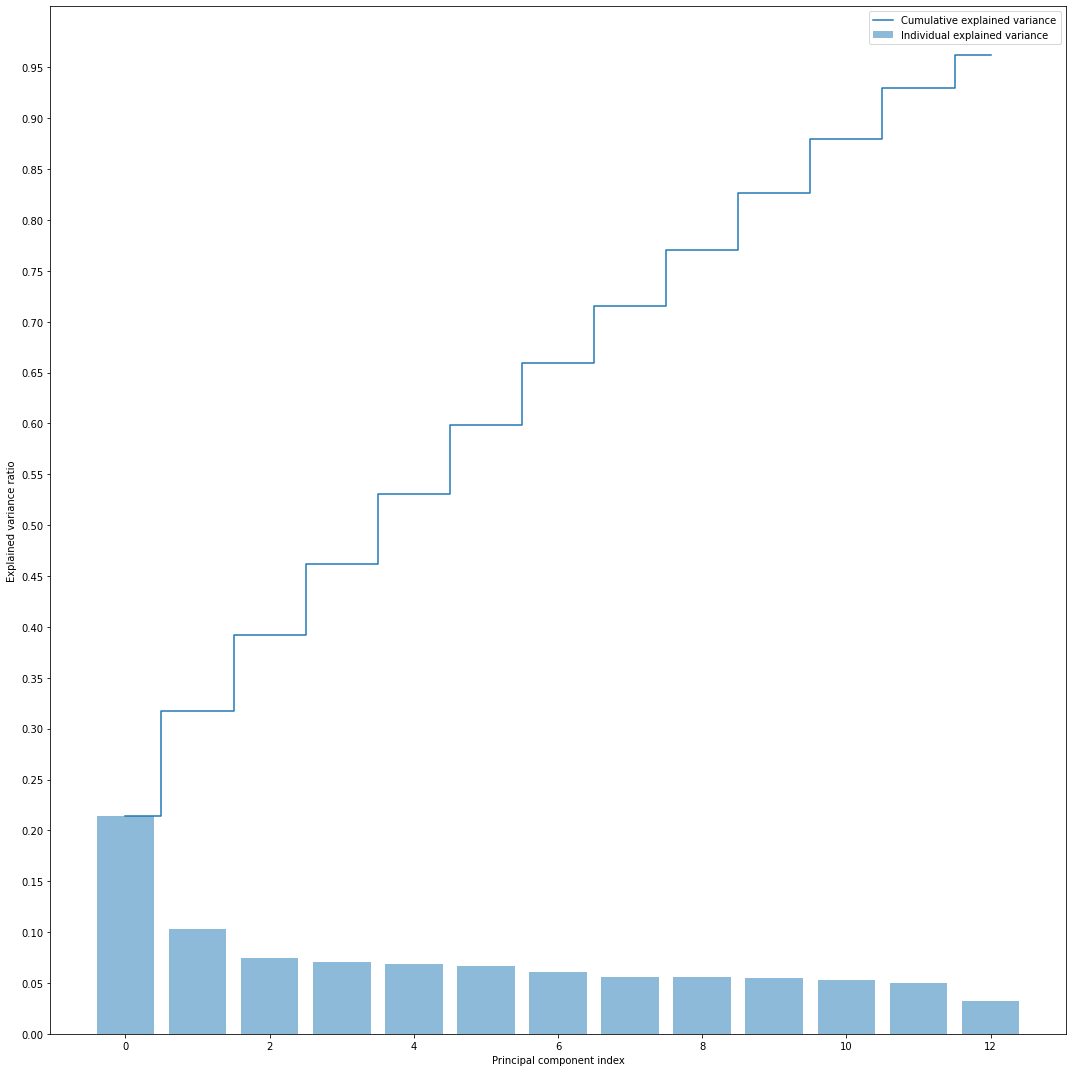

In [ ]:
X_train_PCA, X_test_PCA = do_PCA(X_train_scaled,y_train, X_test_scaled,y_test,n_components = 13)


In [86]:
models, names = get_models()
for i in range(len(models)):
  evaluate("PCA",names[i],models[i],X_train_PCA, y_train, X_test_PCA,y_test)

Training LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





 ConfusionMatrix 
 [[66880  9342]
 [    0     0]]
Training DecisionTreeClassifier()



 ConfusionMatrix 
 [[60004  6555]
 [ 6876  2787]]
Training KNeighborsClassifier()



 ConfusionMatrix 
 [[63647  7709]
 [ 3233  1633]]
Training RandomForestClassifier()



 ConfusionMatrix 
 [[63792  7863]
 [ 3088  1479]]
Training GradientBoostingClassifier()



 ConfusionMatrix 
 [[66876  9341]
 [    4     1]]
Training BaggingClassifier()



 ConfusionMatrix 
 [[63726  7870]
 [ 3154  1472]]
Training GaussianNB()



 ConfusionMatrix 
 [[58063  5621]
 [ 8817  3721]]


In [87]:
pca= display_report()
pca

,model_name,f1_score,recall,accuracy_score,f0.5,f2.0
0,LogisticRegression,0.000000,0.000000,0.877437,0.000000,0.000000
1,DecisionTreeClassifier,0.293291,0.288420,0.823791,0.296294,0.290349
2,KNeighborsClassifier,0.229870,0.335594,0.856446,0.193328,0.283448
3,RandomForestClassifier,0.212668,0.323845,0.856328,0.176344,0.267838
4,GradientBoostingClassifier,0.000214,0.200000,0.877398,0.000134,0.000534
5,BaggingClassifie,0.210767,0.318201,0.855370,0.175263,0.264311
6,Gaussian Naive Bayes,0.340128,0.296778,0.810580,0.372801,0.312721


###Performing Sampling Techniques

####OverSampling SMOTE


In [94]:
X_smote, y_smote = do_sampling(X_train_scaled, y_train, SMOTE)

In [98]:
X_smote.shape, y_smote.shape

((535038, 18), (535038,))

In [99]:
models, names = get_models()
for i in range(len(models)):
  evaluate("SMOTE Sampling", names[i],models[i],X_smote, y_smote, X_test,y_test)



Training LogisticRegression()

PredictingLogisticRegression() scores 


Updated LogisticRegression() scores into report



 ConfusionMatrix 
 [[    0     0]
 [66880  9342]]


Training DecisionTreeClassifier()

PredictingDecisionTreeClassifier() scores 


Updated DecisionTreeClassifier() scores into report



 ConfusionMatrix 
 [[64267  8330]
 [ 2613  1012]]


Training KNeighborsClassifier()

PredictingKNeighborsClassifier() scores 


Updated KNeighborsClassifier() scores into report



 ConfusionMatrix 
 [[66863  9329]
 [   17    13]]


Training RandomForestClassifier()

PredictingRandomForestClassifier() scores 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Updated RandomForestClassifier() scores into report



 ConfusionMatrix 
 [[66880  9342]
 [    0     0]]


Training GradientBoostingClassifier()

PredictingGradientBoostingClassifier() scores 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Updated GradientBoostingClassifier() scores into report



 ConfusionMatrix 
 [[66880  9342]
 [    0     0]]


Training BaggingClassifier()

PredictingBaggingClassifier() scores 


Updated BaggingClassifier() scores into report



 ConfusionMatrix 
 [[64267  8330]
 [ 2613  1012]]


Training GaussianNB()

PredictingGaussianNB() scores 


Updated GaussianNB() scores into report



 ConfusionMatrix 
 [[    0     0]
 [66880  9342]]



In [100]:
display_report()

,technique,model_name,f1_score,recall,accuracy_score,f0.5,f2.0
0,SMOTE Sampling,LogisticRegression,0.218363,0.122563,0.122563,0.411216,0.148649
1,SMOTE Sampling,DecisionTreeClassifier,0.156089,0.279172,0.856433,0.123436,0.212231
2,SMOTE Sampling,KNeighborsClassifier,0.002774,0.433333,0.877384,0.001738,0.006870
3,SMOTE Sampling,RandomForestClassifier,0.000000,0.000000,0.877437,0.000000,0.000000
4,SMOTE Sampling,GradientBoostingClassifier,0.000000,0.000000,0.877437,0.000000,0.000000
5,SMOTE Sampling,BaggingClassifie,0.156089,0.279172,0.856433,0.123436,0.212231
6,SMOTE Sampling,Gaussian Naive Bayes,0.218363,0.122563,0.122563,0.411216,0.148649


#### UnderSampling : Tomek Links

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

In [101]:
X_tomek, y_tomek = do_sampling(X_train_scaled, y_train, TomekLinks)

In [104]:
X_tomek.shape, y_tomek.shape

((289902, 18), (289902,))

In [106]:
models, names = get_models()
for i in range(len(models)):
  evaluate("Tomek Under Sampling", "Tomek" + names[i],models[i],X_tomek, y_tomek, X_test,y_test)



Training LogisticRegression()

PredictingLogisticRegression() scores 


Updated LogisticRegression() scores into report



 ConfusionMatrix 
 [[    0     0]
 [66880  9342]]


Training DecisionTreeClassifier()

PredictingDecisionTreeClassifier() scores 


Updated DecisionTreeClassifier() scores into report



 ConfusionMatrix 
 [[48997  4897]
 [17883  4445]]


Training KNeighborsClassifier()

PredictingKNeighborsClassifier() scores 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Updated KNeighborsClassifier() scores into report



 ConfusionMatrix 
 [[66880  9342]
 [    0     0]]


Training RandomForestClassifier()

PredictingRandomForestClassifier() scores 


Updated RandomForestClassifier() scores into report



 ConfusionMatrix 
 [[65564  8731]
 [ 1316   611]]


Training GradientBoostingClassifier()

PredictingGradientBoostingClassifier() scores 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Updated GradientBoostingClassifier() scores into report



 ConfusionMatrix 
 [[66880  9342]
 [    0     0]]


Training BaggingClassifier()

PredictingBaggingClassifier() scores 


Updated BaggingClassifier() scores into report



 ConfusionMatrix 
 [[66440  9220]
 [  440   122]]


Training GaussianNB()

PredictingGaussianNB() scores 


Updated GaussianNB() scores into report



 ConfusionMatrix 
 [[    0     0]
 [66880  9342]]



In [107]:
display_report()

,technique,model_name,f1_score,recall,accuracy_score,f0.5,f2.0
0,SMOTE Sampling,LogisticRegression,0.218363,0.122563,0.122563,0.411216,0.148649
1,SMOTE Sampling,DecisionTreeClassifier,0.156089,0.279172,0.856433,0.123436,0.212231
2,SMOTE Sampling,KNeighborsClassifier,0.002774,0.433333,0.877384,0.001738,0.006870
3,SMOTE Sampling,RandomForestClassifier,0.000000,0.000000,0.877437,0.000000,0.000000
4,SMOTE Sampling,GradientBoostingClassifier,0.000000,0.000000,0.877437,0.000000,0.000000
5,SMOTE Sampling,BaggingClassifie,0.156089,0.279172,0.856433,0.123436,0.212231
6,SMOTE Sampling,Gaussian Naive Bayes,0.218363,0.122563,0.122563,0.411216,0.148649
7,Tomek Under Sampling,TomekLogisticRegression,0.218363,0.122563,0.122563,0.411216,0.148649
8,Tomek Under Sampling,TomekDecisionTreeClassifier,0.280707,0.199077,0.701136,0.372303,0.225282
9,Tomek Under Sampling,TomekKNeighborsClassifier,0.000000,0.000000,0.877437,0.000000,0.000000


### Combination of Undersampling and OverSampling

In [ ]:
X_SMOTEENN, y_SMOTEENN = do_sampling(X_train_scaled, y_train, SMOTEENN)

In [ ]:
X_SMOTEENN.shape, y_SMOTEENN.shape

In [ ]:
models, names = get_models()
for i in range(len(models)):
  evaluate("SMOTEENN Sampling", names[i],models[i],X_SMOTEENN, y_SMOTEENN, X_test,y_test)


In [ ]:
display_report()